In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91822\OneDrive\Documents\Capstone6\combined.csv")
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN


In [3]:
df.shape

(922311, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922311 entries, 0 to 922310
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                922311 non-null  object 
 1   town                 922311 non-null  object 
 2   flat_type            922311 non-null  object 
 3   block                922311 non-null  object 
 4   street_name          922311 non-null  object 
 5   storey_range         922311 non-null  object 
 6   floor_area_sqm       922311 non-null  float64
 7   flat_model           922311 non-null  object 
 8   lease_commence_date  922311 non-null  int64  
 9   resale_price         922311 non-null  float64
 10  remaining_lease      213261 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.4+ MB


In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,922311.0,95.693911,25.834455,28.0,73.0,93.0,113.0,307.0
lease_commence_date,922311.0,1988.224585,10.609981,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,922311.0,319292.700936,169161.464211,5000.0,193000.0,295000.0,415000.0,1568888.0


Data Preprocessing

In [7]:
df.nunique()

month                   412
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9440
remaining_lease         724
dtype: int64

In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [12]:
df['remaining_lease'].unique()

array([nan, '70', '65', '64', '63', '62', '69', '60', '61', '86', '77',
       '80', '90', '87', '66', '58', '94', '71', '68', '84', '73', '79',
       '76', '72', '82', '74', '67', '88', '81', '89', '53', '54', '55',
       '57', '93', '83', '85', '92', '91', '59', '95', '52', '51', '56',
       '75', '96', '78', '50', '97', '49', '48', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 mont

In [13]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [14]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [15]:
df['remaining_lease'].unique()

array([nan, '70', '65', '64', '63', '62', '69', '60', '61', '86', '77',
       '80', '90', '87', '66', '58', '94', '71', '68', '84', '73', '79',
       '76', '72', '82', '74', '67', '88', '81', '89', '53', '54', '55',
       '57', '93', '83', '85', '92', '91', '59', '95', '52', '51', '56',
       '75', '96', '78', '50', '97', '49', '48', 61.333333333333336,
       60.583333333333336, 62.416666666666664, 62.083333333333336, 63.0,
       61.5, 58.333333333333336, 59.666666666666664, 59.5, 60.0,
       62.666666666666664, 61.0, 60.833333333333336, 59.25,
       61.416666666666664, 60.333333333333336, 62.0, 60.25, 63.75,
       61.083333333333336, 61.833333333333336, 58.5, 59.333333333333336,
       62.916666666666664, 60.666666666666664, 93.66666666666667,
       93.58333333333333, 60.083333333333336, 94.66666666666667,
       78.33333333333333, 60.5, 62.5, 58.0, 70.66666666666667,
       63.333333333333336, 63.5, 67.58333333333333, 61.583333333333336,
       68.16666666666667, 68.25, 56.

In [16]:
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
922306,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,68
922307,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,68
922308,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68
922309,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68
922310,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68


In [17]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [18]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [19]:
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)
df.drop('month', axis = 1, inplace= True)
df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68,1990,01


In [20]:
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
922309,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68,2014,12,7,9
922310,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68,2014,12,4,6


In [21]:
df.drop('storey_range', axis = 1, inplace= True)

In [24]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [25]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [28]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model', 'remaining_lease']

In [29]:
df['town'].value_counts()

town
TAMPINES           79619
YISHUN             69754
BEDOK              66403
JURONG WEST        66364
WOODLANDS          65179
ANG MO KIO         51905
HOUGANG            50488
BUKIT BATOK        44099
CHOA CHU KANG      38079
BUKIT MERAH        34182
PASIR RIS          33107
SENGKANG           32135
TOA PAYOH          31409
QUEENSTOWN         28653
GEYLANG            28071
CLEMENTI           27944
BUKIT PANJANG      27552
KALLANG/WHAMPOA    27023
JURONG EAST        24674
SERANGOON          22744
BISHAN             21202
PUNGGOL            20326
SEMBAWANG          13695
MARINE PARADE       8012
CENTRAL AREA        7120
BUKIT TIMAH         2508
LIM CHU KANG          64
Name: count, dtype: int64

In [30]:
df['flat_type'].value_counts()

flat_type
4 ROOM              350282
3 ROOM              294766
5 ROOM              194356
EXECUTIVE            69365
2 ROOM               11698
1 ROOM                1301
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [25]:
print(len(df[df['flat_type'] == 'MULTI GENERATION']))
print(len(df[df['flat_type'] == 'MULTI-GENERATION']))

279
264


In [32]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [33]:
df['flat_type'].value_counts()

flat_type
4 ROOM              350282
3 ROOM              294766
5 ROOM              194356
EXECUTIVE            69365
2 ROOM               11698
1 ROOM                1301
MULTI GENERATION       543
Name: count, dtype: int64

In [34]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17547
BEDOK RESERVOIR RD    14684
ANG MO KIO AVE 10     13771
ANG MO KIO AVE 3      12118
HOUGANG AVE 8          9331
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [35]:
df['flat_model'].value_counts()

flat_model
Model A                   192816
Improved                  167099
New Generation            109540
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46310
Simplified                 34109
Apartment                  25422
Standard                   25049
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17336
MAISONETTE                 12215
Model A2                   10088
APARTMENT                   9901
DBSS                        3254
Adjoined flat               1243
Model A-Maisonette          1087
MODEL A-MAISONETTE           982
Terrace                      444
Type S1                      434
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      215
Premium Apartment Loft       107
2-room                       103
Premium Maisonette            86
Improved-Maisonette           81

In [36]:
df['flat_model']=df['flat_model'].str.replace('IMPROVED','Improved')
df['flat_model']=df['flat_model'].str.replace('NEW GENERATION','New Generation')
df['flat_model']=df['flat_model'].str.replace('MODEL A','Model A')
df['flat_model']=df['flat_model'].str.replace('STANDARD','Standard')
df['flat_model']=df['flat_model'].str.replace('SIMPLIFIED','Simplified')
df['flat_model']=df['flat_model'].str.replace('MODEL A-MAISONETTE','Model A-Maisonette')
df['flat_model']=df['flat_model'].str.replace('APARTMENT', 'Apartment')
df['flat_model']=df['flat_model'].str.replace('MAISONETTE','Maisonette')
df['flat_model']=df['flat_model'].str.replace('TERRACE','Terrace')
df['flat_model']=df['flat_model'].str.replace('2-ROOM','2-room')
df['flat_model']=df['flat_model'].str.replace('IMPROVED-MAISONETTE','Improved-Maisonette')
df['flat_model']=df['flat_model'].str.replace('MULTI GENERATION','Multi Generation')
df['flat_model']=df['flat_model'].str.replace('PREMIUM APARTMENT','Premium Apartment')


In [37]:
df['flat_model'].value_counts()

flat_model
Model A                   263197
Improved                  240688
New Generation            188438
Simplified                 57367
Premium Apartment          46310
Standard                   42424
Apartment                  35323
Maisonette                 29551
Model A2                   10088
DBSS                        3254
Model A-Maisonette          2069
Adjoined flat               1243
Terrace                      691
Multi Generation             543
Type S1                      434
Type S2                      215
Improved-Maisonette          125
2-room                       124
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          28
PREMIUM Apartment              6
Name: count, dtype: int64

In [38]:
df.duplicated().sum()

2334

In [39]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Detecting Outliers

In [40]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price']

In [41]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

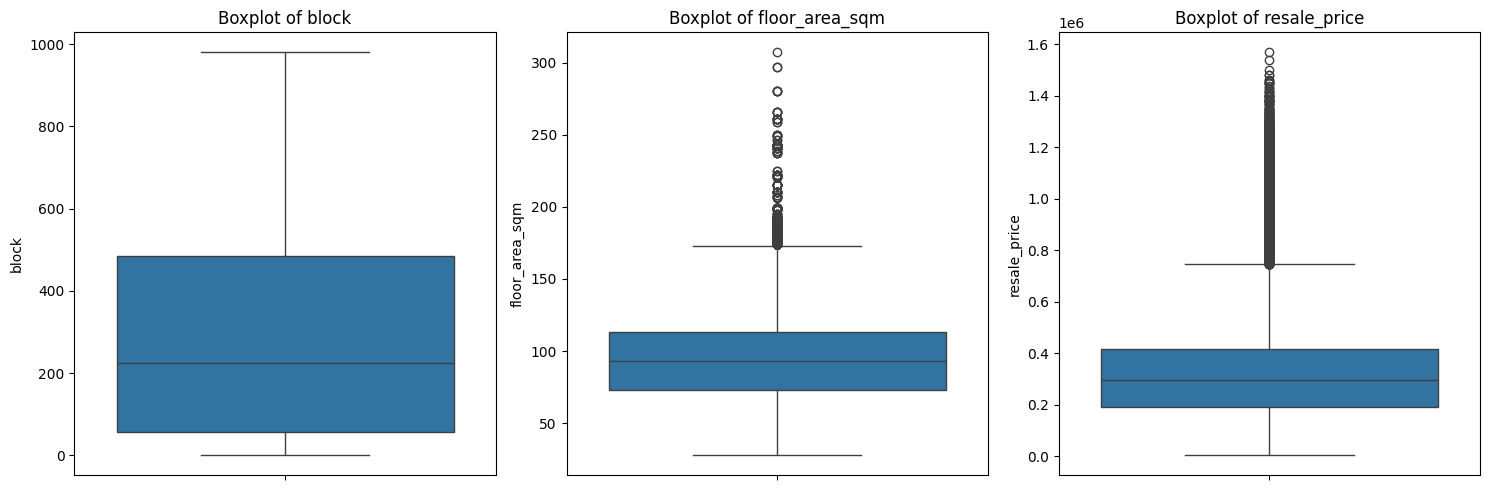

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()


In [56]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(df, ['block', 'floor_area_sqm', 'resale_price'])
print(outliers)


{'block': (-583.5, 1124.5), 'floor_area_sqm': (13.0, 173.0), 'resale_price': (-140000.0, 748000.0)}


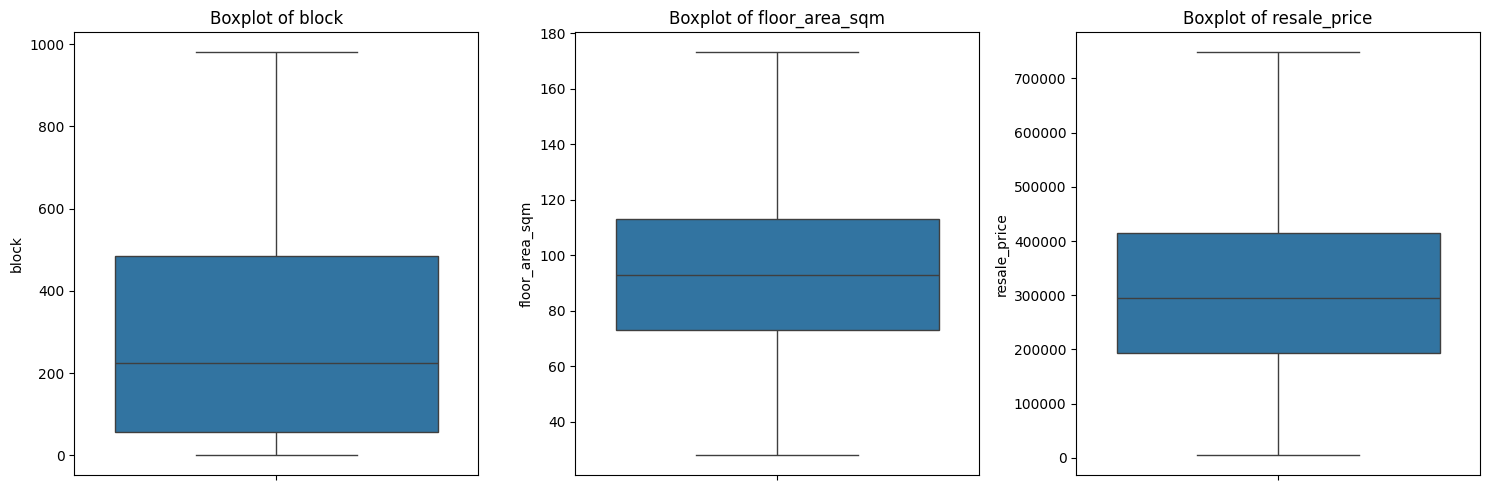

In [57]:
columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()


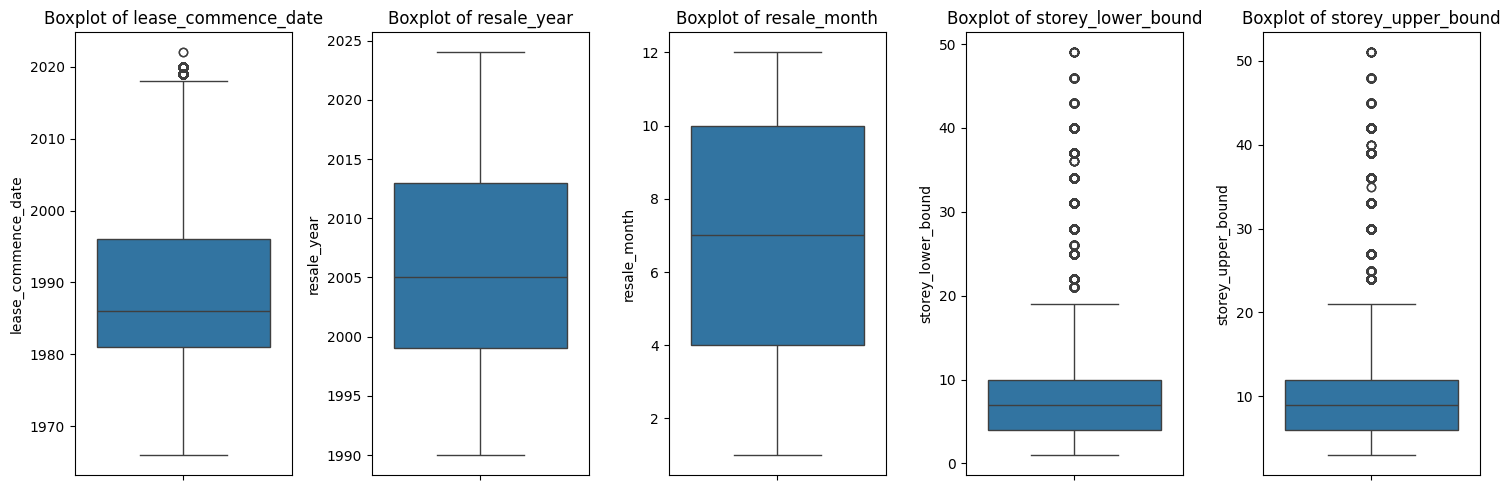

In [58]:
columns_of_interest = ['lease_commence_date',
                        'resale_year',
                        'resale_month',
                        'storey_lower_bound',
                        'storey_upper_bound']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [59]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(df,['lease_commence_date','resale_year','resale_month','storey_lower_bound','storey_upper_bound'] )
print(outliers)

{'lease_commence_date': (1958.5, 2018.5), 'resale_year': (1978.0, 2034.0), 'resale_month': (-5.0, 19.0), 'storey_lower_bound': (-5.0, 19.0), 'storey_upper_bound': (-3.0, 21.0)}


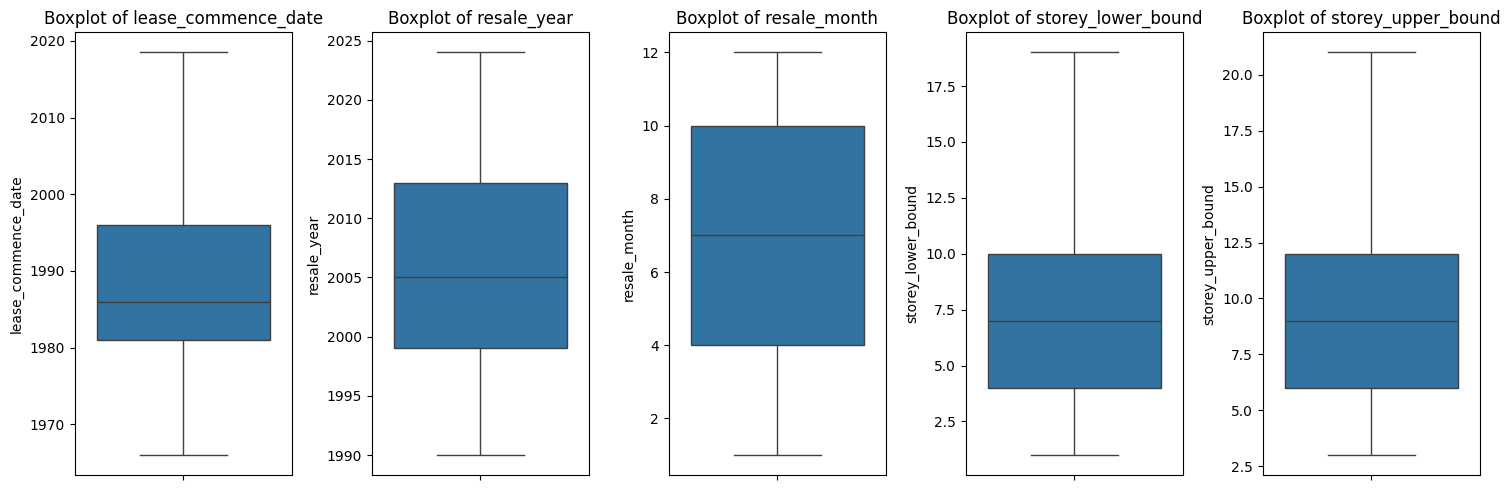

In [60]:
columns_of_interest = ['lease_commence_date',
                        'resale_year',
                        'resale_month',
                        'storey_lower_bound',
                        'storey_upper_bound']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

Descriptive Statistics- EXPLORATARY DATA ANALYSIS Categorical Vs Frequency using BarPlot

In [61]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model', 'remaining_lease']

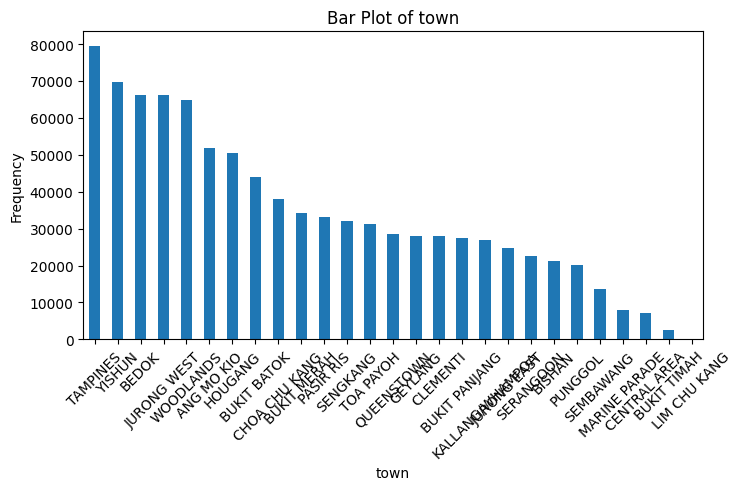

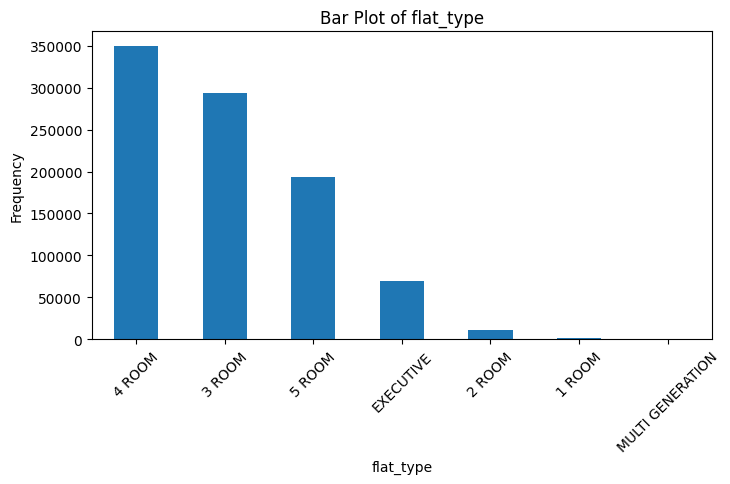

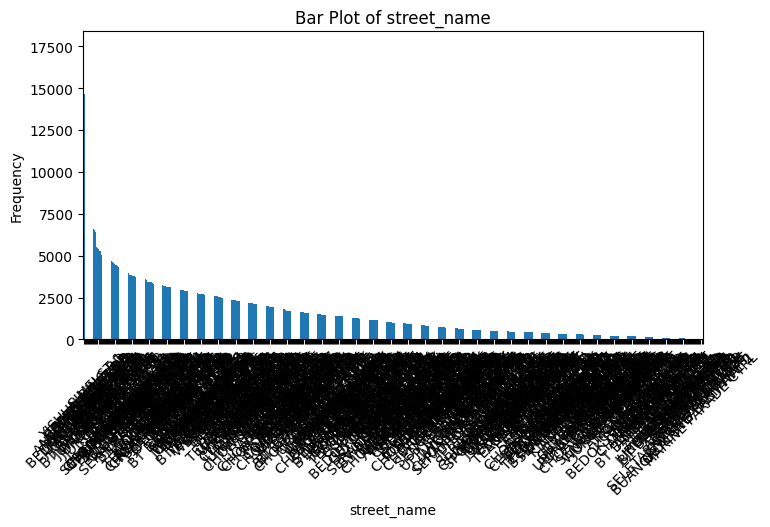

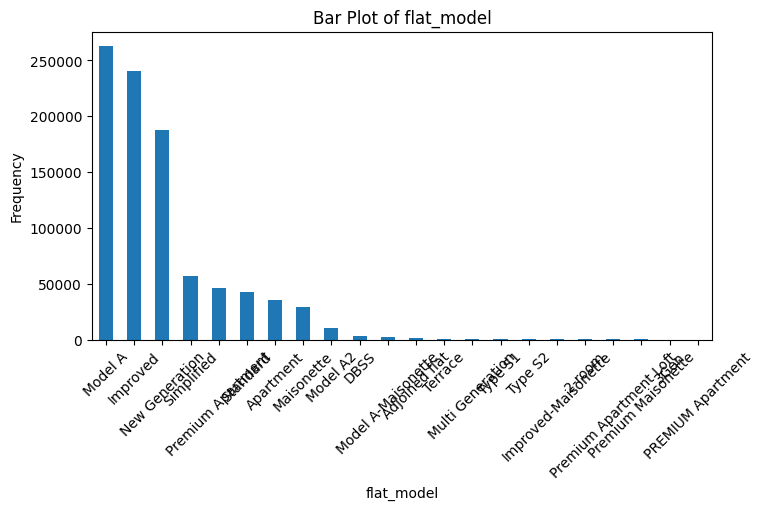

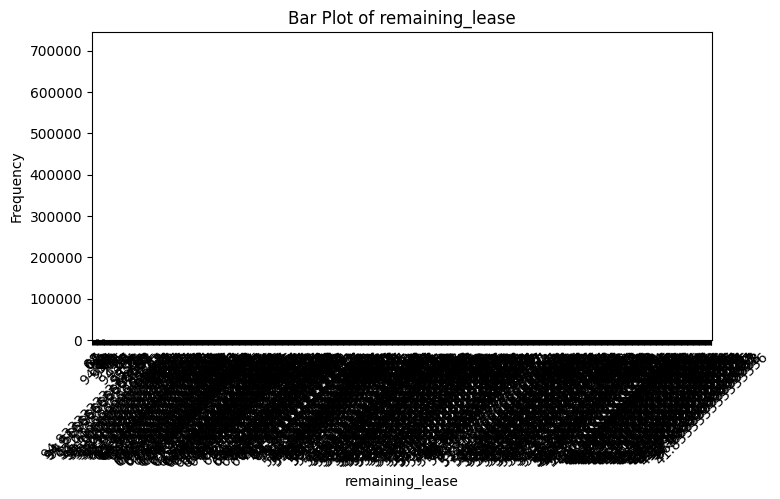

In [65]:
import matplotlib.pyplot as plt

def plot_bar(df, column):
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar')
    plt.title('Bar Plot of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Example usage:
columns_to_plot = ['town', 'flat_type', 'street_name', 'flat_model', 'remaining_lease']
for column in columns_to_plot:
    plot_bar(df, column)


Feature Vs Target (Categorical Data )

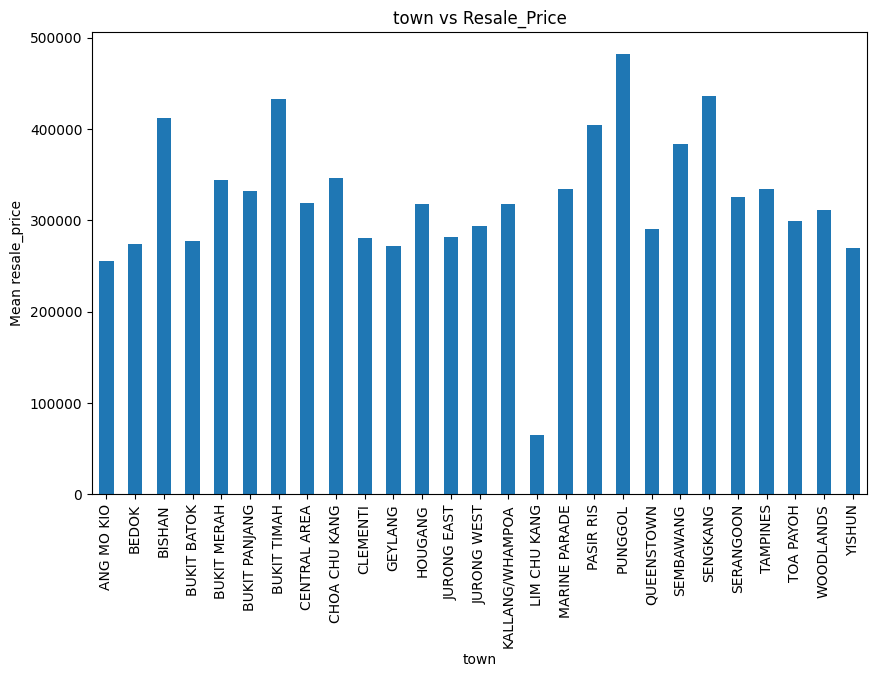

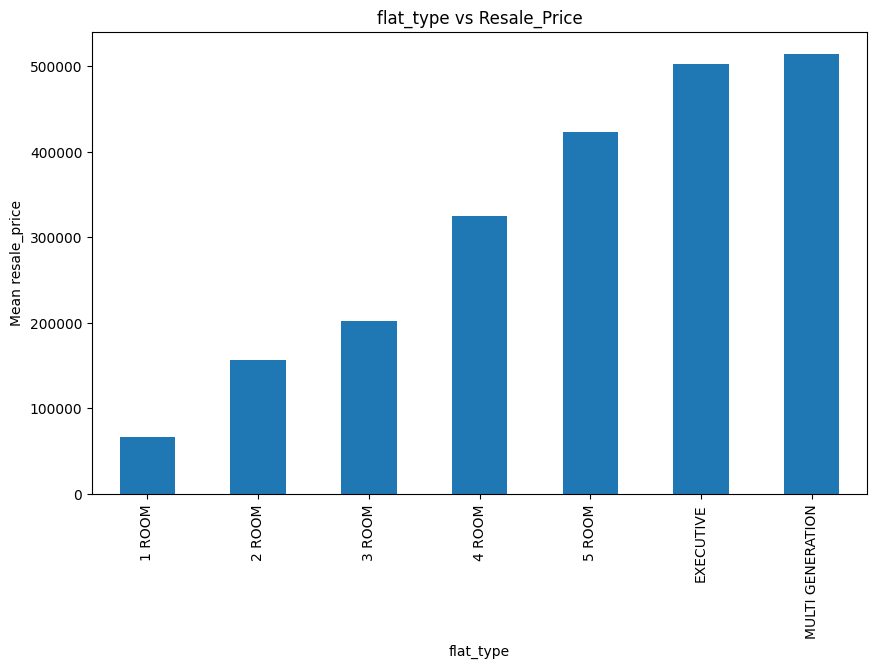

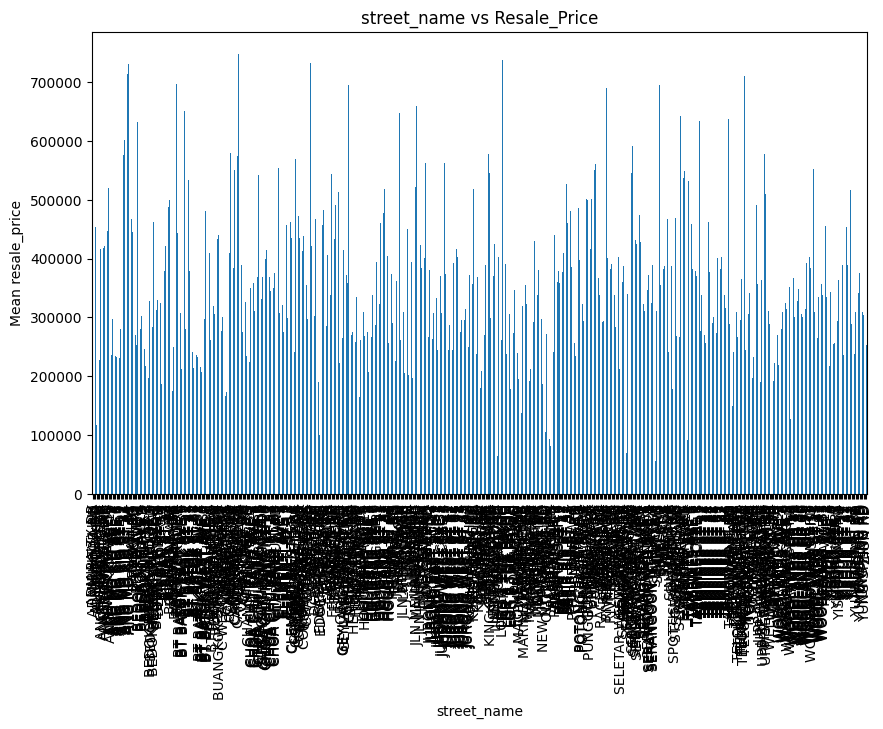

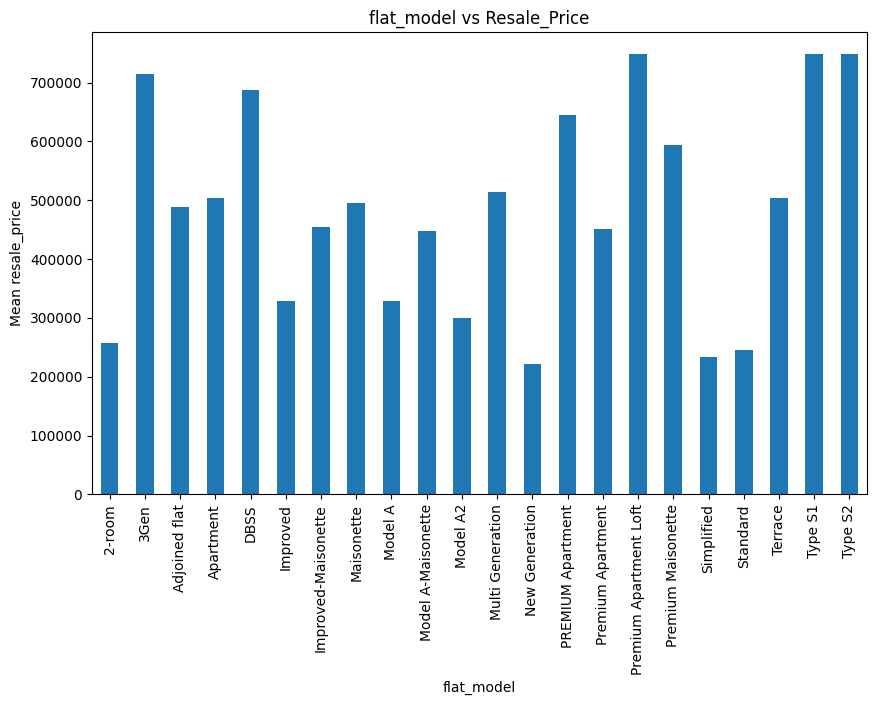

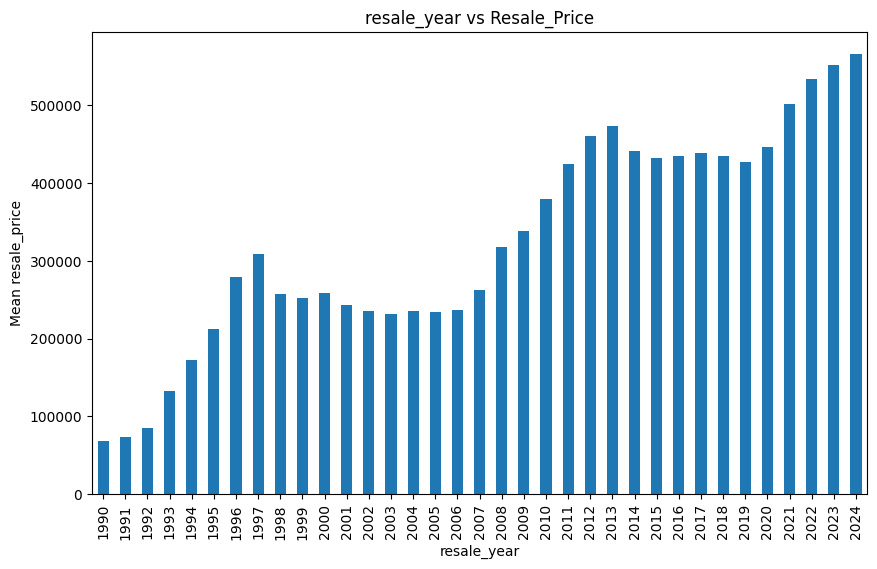

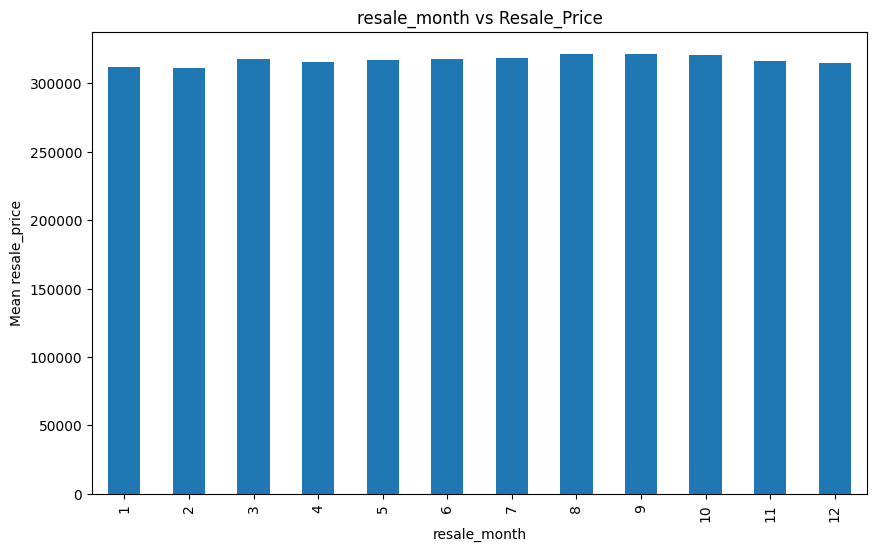

In [67]:
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Resale_Price')
    plt.show()

Feature Vs Target (Continuous Data )

In [68]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'lease_commence_date', 'resale_price']

In [69]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

Encoding Categorical Variables

In [72]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model', 'remaining_lease']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [73]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [74]:
df1['street_name'] = df1['street_name'].map(streets_mapping)

In [75]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [76]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)


In [77]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)


In [78]:
df1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [79]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)


In [80]:
df1.to_csv('Proceesed_data.csv')

Correlation Matrix

<Axes: >

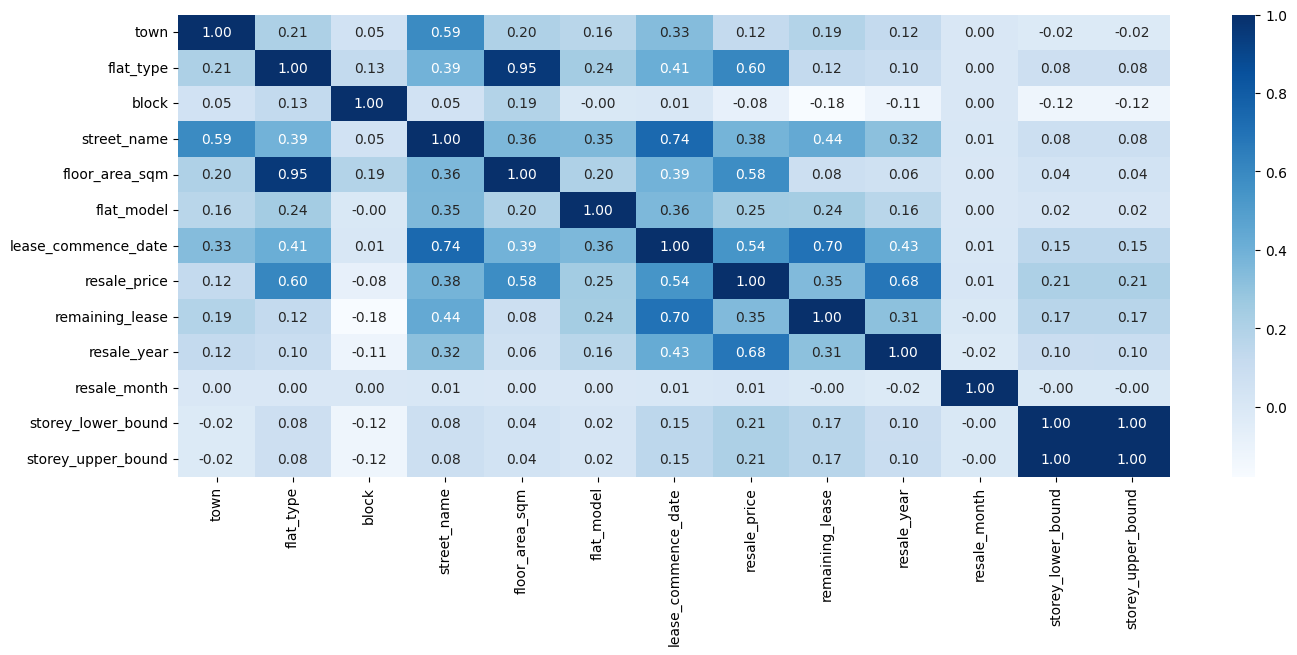

In [81]:
corrm=df1.corr()
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [97]:
df1.isna().any().any()

False

In [93]:
nan_columns = df1.columns[df1.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['flat_model']


In [96]:
df1['flat_model']=df1['flat_model'].mode()[0]

In [123]:
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,16.0,1977.0,9000.0,68,1990,1,10,12
1,1,1,309.0,1,31.0,16.0,1977.0,6000.0,68,1990,1,4,6


In [128]:
df['storey_upper_bound'].min()

3

In [98]:
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [99]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(735981, 12) (183996, 12) (735981,) (183996,)


In [100]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.11015581, -1.06987933, -0.87400913, ..., -1.04144099,
         -0.12951139,  0.31725296],
        [ 0.30073286, -2.1246292 , -0.7635599 , ...,  0.12792138,
         -0.57948826, -0.58288399],
        [ 0.9420459 , -0.01512946,  1.29308089, ...,  1.58962434,
         -1.25445357, -1.2579867 ],
        ...,
        [ 1.45509633,  1.03962041, -0.19227079, ..., -0.16441922,
          1.44540765,  1.44242414],
        [ 0.42899547, -0.01512946, -1.11014196, ...,  0.12792138,
          1.44540765,  1.44242414],
        [-1.23841842, -0.01512946,  0.44376442, ...,  0.71260256,
         -0.57948826, -0.58288399]]),
 array([[ 0.68552069,  1.03962041,  0.29903784, ..., -1.62612218,
          0.09547704,  0.09221872],
        [-0.46884278,  1.03962041, -1.06443883, ...,  1.00494316,
         -0.57948826, -0.58288399],
        [ 1.32683372, -0.01512946,  0.15050267, ...,  0.71260256,
          0.77044235,  0.76732143],
        ...,
        [-0.21231756, -1.06987933, -0.99207555, ...,  

MODEL FITTING

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [102]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[510042.35021918 493977.10874009 480996.03084217 ... 264488.8628435
 337465.24030831 335792.44009087]
675681    515000.0
689986    555000.0
773466    360000.0
717308    538000.0
626844    281000.0
            ...   
31682      67000.0
785509    722000.0
510684    140000.0
498530    240000.0
658111    310000.0
Name: resale_price, Length: 183996, dtype: float64


In [105]:
print("Linear Model Score: ",linear_model.score(X_test, y_test))

Linear Model Score:  0.7925928066607594


In [106]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
print("Cross Validation score for Linear Model: ",cross_val_linear_model)

Cross Validation score for Linear Model:  0.7926964712061239


2. KNN (K Nearest Neighbor) REGRESSION

In [108]:
import numpy as np

In [109]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28163.86043743342
Mean Squared Error (MSE)     : 1704997736.5612886
Root Mean Square Error (RMSE): 41291.61823616615
R-squared (R2) Score         : 0.9347330682307219


3. DECISION TREE REGRESSION

In [110]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17456.04569187397
Mean Squared Error (MSE)     : 671274973.2458535
Root Mean Square Error (RMSE): 25908.974762538433
R-squared (R2) Score         : 0.9743037442585566


4. RANDOM FOREST REGRESSION

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13884.990504335778
Mean Squared Error (MSE)     : 403503941.024467
Root Mean Square Error (RMSE): 20087.407523731552
R-squared (R2) Score         : 0.9845539594436101


Best Model - Prediction

In [113]:
! pip install --upgrade nbformat

   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2


In [114]:
import plotly.express as px

In [116]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor']
score = [r2_knn,r2_dt, rf_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9347330682307219
DecisionTreeRegressor 0.9743037442585566
RandomForestRegressor 0.9845539594436101

Model: RandomForestRegressor contain Maximum R2_Score: 0.9845539594436101 


Save the Model

In [118]:
model=rf_regressor.fit(X_train, y_train)
model

RandomForestRegressor(random_state=42)

In [119]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [120]:
#Predictions

pre_df =df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
243455,16,2,56.0,166,46.0,16.0,1970.0,56000.0,68,1999,3,4,6
676543,14,3,7.0,239,69.0,16.0,2011.0,590000.0,94,2016,2,4,6
556661,22,5,149.0,222,121.0,16.0,1985.0,328000.0,68,2008,8,10,12
355378,13,3,481.0,136,67.0,16.0,1985.0,128000.0,68,2001,11,4,6
590931,1,3,120.0,2,67.0,16.0,1978.0,268000.0,68,2009,11,1,3


In [121]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [122]:
pre_pred = rf_regressor.predict(A)
pre_pred

array([ 59951.66666667, 586148.88      , 324040.        , 131678.33333333,
       250637.        ])